<a href="https://colab.research.google.com/github/rishik312004/Ris_hik/blob/main/example_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
data_train_path='/content/drive/MyDrive/mint/mint/train'
data_test_path='/content/drive/MyDrive/mint/mint/test'

In [ ]:
img_width=180
img_height=180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(data_train_path,image_size=(img_width,img_height),shuffle=True,batch_size=32,
                                                      validation_split=False)

Found 782 files belonging to 3 classes.


In [ ]:
data_cat=data_train.class_names
print(data_cat)

['contamination', 'crack', 'good']


In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_width,img_height),shuffle=True,batch_size=32,
                                                      validation_split=False)


Found 168 files belonging to 3 classes.


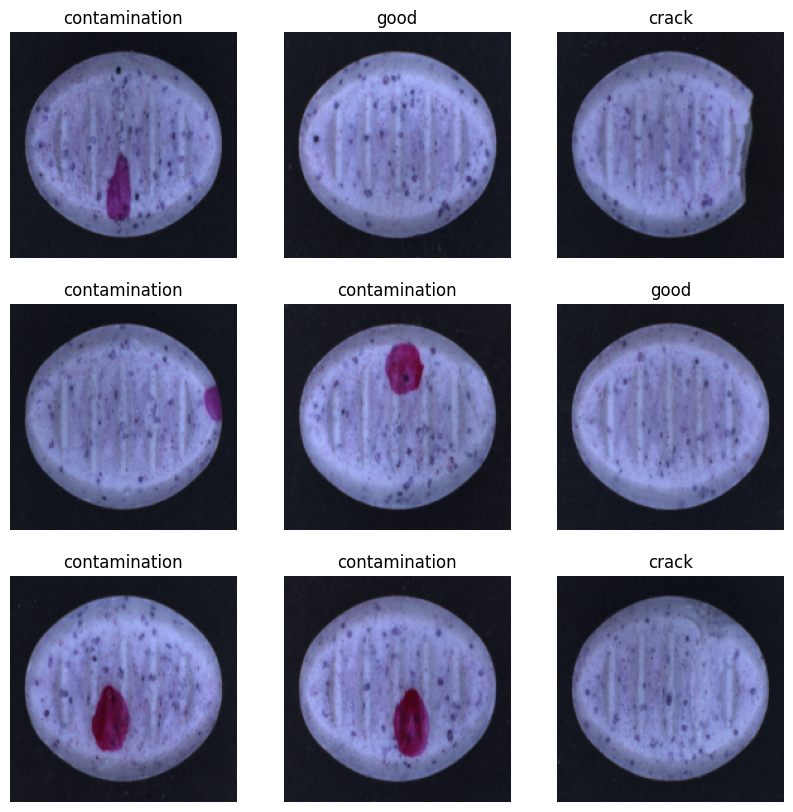

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_cat[labels[i]])
    plt.axis('off')

In [ ]:
#BUILDING MODEL USING FUNCTIONAL API
input_layer=layers.Input(shape=(img_width,img_height,3))
x=layers.Conv2D(filters=16,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x= layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dropout(0.25)(x)
output_layer=layers.Dense(len(data_cat),activation='softmax')(x)
model=models.Model(input_layer,output_layer)


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history=model.fit(data_train,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.4030 - loss: 177.7908
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8342 - loss: 2.8021
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.7818 - loss: 0.3842
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8915 - loss: 0.3728
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.8856 - loss: 0.3339
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8809 - loss: 0.3179
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8457 - loss: 0.3418
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8282 - loss: 0.3150
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8621 - loss: 0.2604
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9292 - loss: 0.1908
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.8947 - loss: 0.1654
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accurac

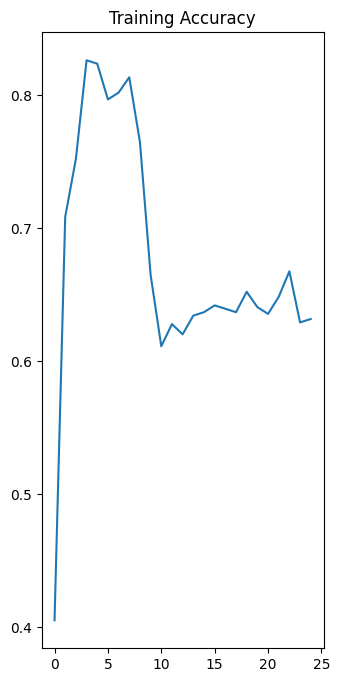

In [ ]:
epochs_range=range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
#plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training Accuracy')
plt.show()

In [ ]:
image_path='/content/drive/MyDrive/mint/mint/test/contamination/pill_mint_contamination_015.png'
image=tf.keras.utils.load_img(image_path,target_size=(img_width,img_height))
img_arr=tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict=model.predict(img_bat)
score=tf.nn.softmax(predict)
print('image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
image is contamination with accuracy of 36.21


In [ ]:
model.save('pill.keras')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img
model = tf.keras.models.load_model('pill.keras')
img_width = 180
img_height = 180
data_train_path = '/content/drive/MyDrive/mint/mint/train'
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path, image_size=(img_width, img_height))
data_cat = data_train.class_names
print(f"Class names: {data_cat}")
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()
while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break
    img = cv2.resize(frame, (img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    label = data_cat[predicted_class]
    confidence = np.max(predictions[0]) * 100
    text = f"{label}: {confidence:.2f}%"
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Webcam Feed', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
